In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
features = pd.read_csv("../../out/features.csv")

In [30]:
features

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,1.245255,-0.011225,-1.796371,-1.675807,1.653327,-3.777580,0.611488,-0.804778,1.065094,2.131520,...,0.034763,-0.006950,-0.022417,0.003286,-0.019195,-0.045274,0.011436,-0.021713,-0.025240,6
1,-0.115519,1.221322,-2.663727,-1.850806,2.406776,-4.505530,0.086357,-1.272112,1.072248,2.755881,...,0.012313,0.006082,-0.052635,-0.036994,-0.000561,-0.015391,0.022361,-0.109649,-0.040788,6
2,-0.072259,0.182794,-0.924145,1.465884,0.087118,-2.705031,1.063076,-0.548272,-0.142621,2.133661,...,-0.008467,0.026075,-0.004174,-0.022759,0.000592,0.017941,0.031008,-0.057567,0.014700,2
3,-0.354590,0.528832,-1.314592,-9.367224,5.348573,-3.304583,-0.103055,-3.183744,3.717564,1.649589,...,-0.024991,-0.017117,-0.060647,-0.003745,0.065801,-0.013731,0.018318,-0.073385,0.021042,6
4,-0.508426,0.442439,-1.651242,-8.392424,4.559665,-2.253845,0.089973,-3.745551,2.727760,1.881642,...,-0.049575,-0.025487,-0.065809,0.014414,0.048510,-0.026703,0.020534,-0.065328,-0.007918,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,0.063039,0.072514,-0.224550,-0.155767,-0.105580,0.427770,-1.678660,0.235991,0.122060,0.780008,...,-0.021648,-0.019741,-0.018724,-0.028742,0.012672,-0.012498,-0.004531,0.022628,0.040004,0
1553,-0.591093,-0.062570,-0.650210,0.785083,1.162638,-0.258387,-0.266413,0.698774,-2.580951,-0.344890,...,0.038919,-0.004247,0.015411,-0.024702,0.033025,0.020439,0.007388,0.023554,0.036408,5
1554,-0.346435,-0.006911,-0.589036,1.584675,0.092080,-0.474164,-2.266018,1.574024,-1.596762,2.643175,...,0.040816,-0.058228,-0.006264,-0.062565,-0.005076,-0.034787,0.043484,0.064691,0.000682,4
1555,1.154594,-0.307687,-1.217349,0.058508,0.842178,-0.524302,-0.637316,0.837326,-0.055258,0.789229,...,0.015036,-0.009071,0.004990,0.004283,-0.004594,-0.007754,0.025323,0.000325,0.016714,4


In [31]:
features["category"].unique()

array([6, 2, 0, 1, 4, 5, 3])

In [32]:
soma_colunas = features.sum()
colunas_soma_zero = soma_colunas[soma_colunas.eq(0)]

numero_colunas_soma_zero = len(colunas_soma_zero)

print(numero_colunas_soma_zero)

0


In [33]:
features[features < 0] = 0

In [34]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])

In [35]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:, 0:99], features.iloc[:, 100])
fscores, precisions, recalls = [], [], []

acc = []
precision = []
recall = []
w_avg_f = []
m_avg_f = []

w_avg_p = []
m_avg_p = []

w_avg_r = []
m_avg_r = []

for train_index, test_index in split:
  
    X_train, Y_train = features.loc[train_index].iloc[:,
                                                        :99], features.loc[train_index].iloc[:, 100]
    x_test, y_test = features.loc[test_index].iloc[:,
                                                    :99], features.loc[test_index].iloc[:, 100]

    model = svm.SVC(
        kernel="linear", decision_function_shape='ovo',  class_weight="balanced")
    model.fit(X_train, Y_train)

    y_predicted = model.predict(x_test)
    
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))

    fscores.append(fscore)
    precisions.append(precision)
    recalls.append(recall)

    w_avg_f.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg_f.append(f1_score(y_test, y_predicted, average='macro'))

    w_avg_p.append(precision_score(
        y_test, y_predicted, average='weighted'))
    m_avg_p.append(precision_score(y_test, y_predicted, average='macro'))

    w_avg_r.append(recall_score(y_test, y_predicted, average='weighted'))
    m_avg_r.append(recall_score(y_test, y_predicted, average='macro'))
    class_labels = sorted(set(y_test))


In [37]:
name_columns = [x for x in class_labels]
metrics_f = pd.DataFrame(fscores, columns = name_columns)
metrics_p = pd.DataFrame(precisions, columns = name_columns)
metrics_r = pd.DataFrame(recalls, columns = name_columns)

metrics_f["accuracy"] = acc
metrics_f["macro avg"] = m_avg_f
metrics_f["weighted avg"] = w_avg_f

metrics_p["weighted avg"] = w_avg_p
metrics_p["macro avg"] = m_avg_p

metrics_r["weighted avg"] = w_avg_r
metrics_r["macro avg"] = m_avg_r

print("Métricas precision:")
display(metrics_p)

print("Métricas recall:")
display(metrics_r)

print("Métricas fscore:")
display(metrics_f)

Métricas precision:


,0,1,2,3,4,5,6,weighted avg,macro avg
0,0.193548,0.062500,0.576923,0.071429,0.033333,0.437500,0.116667,0.386001,0.213129
1,0.294118,0.015385,0.590909,0.151515,0.121212,0.557692,0.088235,0.433170,0.259867
2,0.244444,0.071429,0.389831,0.090909,0.119048,0.354167,0.076923,0.304340,0.192393
3,0.169231,0.028571,0.509434,0.117647,0.054054,0.468085,0.100000,0.379195,0.206717
4,0.163636,0.045455,0.456140,0.117647,0.000000,0.442308,0.076923,0.334867,0.186016


Métricas recall:


,0,1,2,3,4,5,6,weighted avg,macro avg
0,0.292683,0.150000,0.260870,0.250000,0.076923,0.147368,0.350000,0.221154,0.218263
1,0.306122,0.071429,0.247619,0.333333,0.190476,0.308511,0.214286,0.266026,0.238825
2,0.239130,0.250000,0.200000,0.400000,0.294118,0.178947,0.176471,0.209003,0.248381
3,0.305556,0.062500,0.225000,0.307692,0.285714,0.222222,0.200000,0.228296,0.229812
4,0.209302,0.083333,0.224138,0.333333,0.000000,0.250000,0.230769,0.215434,0.190125


Métricas fscore:


,0,1,2,3,4,5,6,accuracy,macro avg,weighted avg
0,0.233010,0.088235,0.359281,0.111111,0.046512,0.220472,0.175000,0.221154,0.176232,0.251839
1,0.300000,0.025316,0.348993,0.208333,0.148148,0.397260,0.125000,0.266026,0.221864,0.310985
2,0.241758,0.111111,0.264368,0.148148,0.169492,0.237762,0.107143,0.209003,0.182826,0.229363
3,0.217822,0.039216,0.312139,0.170213,0.090909,0.301370,0.133333,0.228296,0.180714,0.261341
4,0.183673,0.058824,0.300578,0.173913,0.000000,0.319444,0.115385,0.215434,0.164545,0.248079


In [39]:
metrics_f.columns

Index([0, 1, 2, 3, 4, 5, 6, 'accuracy', 'macro avg', 'weighted avg'], dtype='object')

<AxesSubplot: xlabel='variable', ylabel='value'>

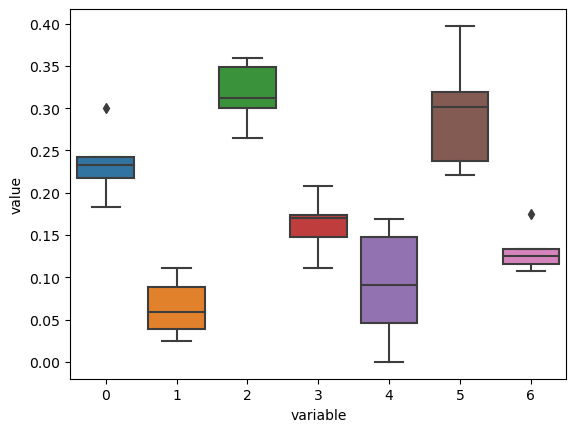

In [42]:
sns.boxplot(x="variable", y="value", data=metrics_f[[0, 1, 2, 3, 4, 5, 6]].melt())